<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Searchlight" data-toc-modified-id="Searchlight-1">Searchlight</a></span><ul class="toc-item"><li><span><a href="#Upsides" data-toc-modified-id="Upsides-1.1">Upsides</a></span></li><li><span><a href="#Downsides" data-toc-modified-id="Downsides-1.2">Downsides</a></span></li><li><span><a href="#Example-applications" data-toc-modified-id="Example-applications-1.3">Example applications</a></span></li><li><span><a href="#Relevance-to-other-analysis-techniques" data-toc-modified-id="Relevance-to-other-analysis-techniques-1.4">Relevance to other analysis techniques</a></span></li></ul></li><li><span><a href="#Relevant-resources/publications" data-toc-modified-id="Relevant-resources/publications-2">Relevant resources/publications</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-3">Simulation</a></span></li></ul></div>

# Searchlight
If the goal of the researcher is to explore where the brain is most responsive to a task or which regions are correlated to a task, it may be useful to create a statistical map (t-map, f-map) or to employ searchlight mapping. Essentially, a statistical map involves repeating the analysis for every voxel separately and plotting the corresponding statistical value (e.g., t or F value) for each voxel onto the brain. A searchlight map involves repeated analyses for a number of spherical regions of interest. Imagine dividing up your entire brain into many spherical regions and then likewise calculating the corresponding t-value for every sphere.

## Upsides

lorem

## Downsides
lorem

## Example applications
lorem

## Relevance to other analysis techniques
lorem

# Relevant resources/publications

* lorem
* lorem

# Simulation
First import the data and a few standard Python packages.

In [1]:
# general packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as spatial

# pull data from GitHub
import requests, io
for array in ['comedy','horror','coord']:
    globals()['{}'.format(array)] = np.load(io.BytesIO(requests.get(
        'http://github.com/PaulScotti/fmriplayground/raw/main/methods/searchlight/{}.npy?raw=true'.format(array)).content),allow_pickle=True)

# change default plotting
plt.rcParams.update({'font.size': 14, 'figure.figsize': (8,5)})

# overview of the data
num_conditions = 2 # 2 conditins: Comedy and Horror
num_voxels = len(comedy) #8000 voxels per condition

In this example, we provide voxel activations for each of two conditions: one where the participant was watching a comedy movie and another where the participant was watching a horror movie. Now let's visualize our brain, composed of voxels with each voxel representing a certain activation strength (e.g., beta weights from general linear model). Note that this simulated brain is a cube for simplicity, where the x y and z axes all span a range of 20 voxels. This means that there are 8,000 total voxels in this brain-cube (20 cubed = 8,000).

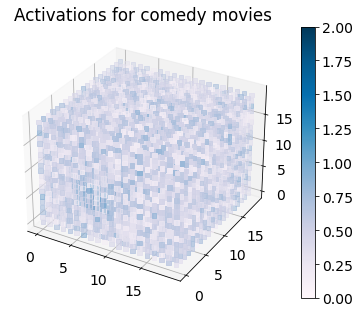

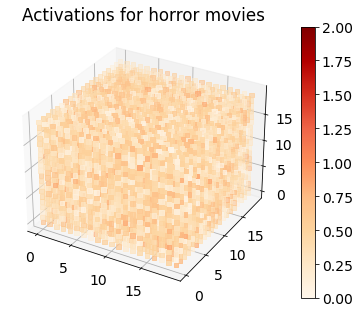

In [2]:
from mpl_toolkits.mplot3d import Axes3D

# Comedy
fig = plt.figure()
ax = fig.gca(projection='3d')
p = ax.scatter(coord[:,0],
           coord[:,1],
           coord[:,2],
           c=comedy,
           marker='s',vmin=0,vmax=2,
           cmap='PuBu')
fig.colorbar(p)
plt.title("Activations for comedy movies")
plt.show()

# Horror
fig = plt.figure()
ax = fig.gca(projection='3d')
p = ax.scatter(coord[:,0],
           coord[:,1],
           coord[:,2],
           c=horror,
           marker='s',vmin=0,vmax=2,
           cmap='OrRd')
fig.colorbar(p)
plt.title("Activations for horror movies")
plt.show()

Now let's pick a random location and cut out a sphere with a radius of 5 voxels for each of the above brain-cubes, and calculate the difference.

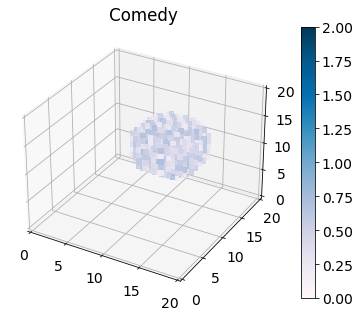

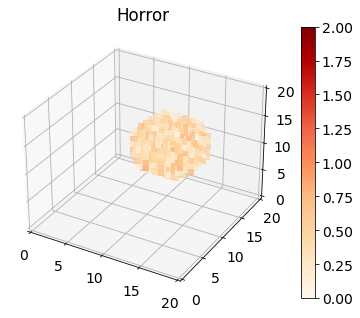

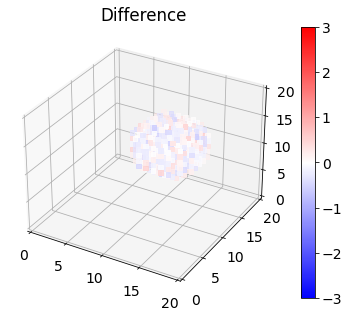

In [3]:
x0 = 12
y0 = 12
z0 = 12
center=np.array([x0,y0,z0])
cutoff=5

distance=spatial.distance.cdist(coord,center.reshape(1,-1)).ravel()
points_in_sphere=coord[distance<cutoff]

# Comedy
fig = plt.figure()
ax = fig.gca(projection='3d')
p = ax.scatter(points_in_sphere[:,0],
           points_in_sphere[:,1],
           points_in_sphere[:,2],
           c=comedy[distance<cutoff],
           marker='s',cmap='PuBu',vmin=0,vmax=2)
fig.colorbar(p)
ax.set_xlim3d(0,20)
ax.set_ylim3d(0,20)
ax.set_zlim3d(0,20)
plt.title("Comedy")
plt.show()

# Horror
fig = plt.figure()
ax = fig.gca(projection='3d')
p = ax.scatter(points_in_sphere[:,0],
           points_in_sphere[:,1],
           points_in_sphere[:,2],
           c=horror[distance<cutoff],
           marker='s',cmap='OrRd',vmin=0,vmax=2)
fig.colorbar(p)
ax.set_xlim3d(0,20)
ax.set_ylim3d(0,20)
ax.set_zlim3d(0,20)
plt.title("Horror")
plt.show()

# Difference
fig = plt.figure()
ax = fig.gca(projection='3d')
p = ax.scatter(points_in_sphere[:,0],
           points_in_sphere[:,1],
           points_in_sphere[:,2],
           c=horror[distance<cutoff]-comedy[distance<cutoff],
           marker='s',cmap='bwr',vmin=-3,vmax=3)
fig.colorbar(p)
ax.set_xlim3d(0,20)
ax.set_ylim3d(0,20)
ax.set_zlim3d(0,20)
plt.title("Difference")
plt.show()

Let's repeat this procedure for every possible sphere location, keeping track of the average difference between conditions for every sphere.

In [4]:
diffs=np.full(num_voxels,np.nan)
coord_tracker=np.full((num_voxels,3),np.nan)
cnt=0
for x0 in range(20):
    for y0 in range(20):
        for z0 in range(20):
            center=np.array([x0,y0,z0])
            distance=spatial.distance.cdist(coord,center.reshape(1,-1)).ravel()
            points_in_sphere=coord[distance<cutoff]
            diffs[cnt] = np.abs(np.mean(horror[distance<cutoff]-comedy[distance<cutoff]))
            coord_tracker[cnt,:]=[x0,y0,z0]
            cnt+=1

print("Largest absolute difference found at x={} y={} z={}".format(coord_tracker[np.argmax(diffs),0],
                                                             coord_tracker[np.argmax(diffs),1],
                                                             coord_tracker[np.argmax(diffs),2]))

Largest absolute difference found at x=6.0 y=6.0 z=6.0


And now let's take a look at the sphere where there was the largest difference of conditions! In this way we have explored where the brain was most responsive to task-specific information.

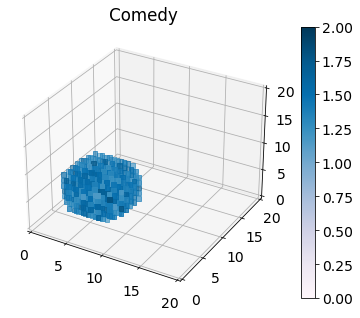

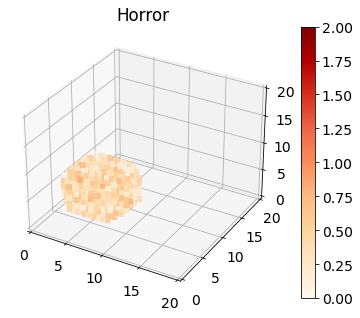

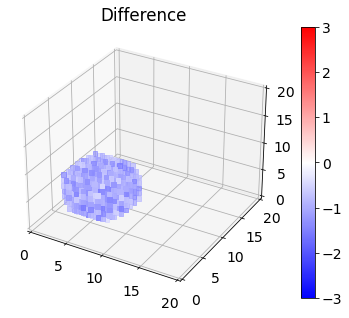

In [5]:
x0, y0, z0 = coord_tracker[np.argmax(diffs)]
center=np.array([x0,y0,z0])

distance=spatial.distance.cdist(coord,center.reshape(1,-1)).ravel()
points_in_sphere=coord[distance<cutoff]

# Comedy
fig = plt.figure()
ax = fig.gca(projection='3d')
p = ax.scatter(points_in_sphere[:,0],
           points_in_sphere[:,1],
           points_in_sphere[:,2],
           c=comedy[distance<cutoff],
           marker='s',cmap='PuBu',vmin=0,vmax=2)
fig.colorbar(p)
ax.set_xlim3d(0,20)
ax.set_ylim3d(0,20)
ax.set_zlim3d(0,20)
plt.title("Comedy")
plt.show()

# Horror
fig = plt.figure()
ax = fig.gca(projection='3d')
p = ax.scatter(points_in_sphere[:,0],
           points_in_sphere[:,1],
           points_in_sphere[:,2],
           c=horror[distance<cutoff],
           marker='s',cmap='OrRd',vmin=0,vmax=2)
fig.colorbar(p)
ax.set_xlim3d(0,20)
ax.set_ylim3d(0,20)
ax.set_zlim3d(0,20)
plt.title("Horror")
plt.show()

# Difference
fig = plt.figure()
ax = fig.gca(projection='3d')
p = ax.scatter(points_in_sphere[:,0],
           points_in_sphere[:,1],
           points_in_sphere[:,2],
           c=horror[distance<cutoff]-comedy[distance<cutoff],
           marker='s',cmap='bwr',vmin=-3,vmax=3)
fig.colorbar(p)
ax.set_xlim3d(0,20)
ax.set_ylim3d(0,20)
ax.set_zlim3d(0,20)
plt.title("Difference")
plt.show()

The searchlight methods described above can also be used in t-test and F-test. Using searchlight, we can know the significant regions in a task and the significantly different regions between two conditions.

In [6]:
## Code used to simulate the data instead of loading it from GitHub: ##
import numpy as np
import scipy as sp
import scipy.stats as stats
np.random.seed(1)
num_conditions = 2
num_voxels = 8000

comedy=np.full(num_voxels,np.nan)
horror=np.full(num_voxels,np.nan)

from scipy import signal
def make_noncirc_gaussian_iter(mu,sd,stim_max=360):
    if np.isscalar(mu):
        mu=[mu]
    if np.isscalar(sd):
        sd=[sd]
    return np.array([stats.norm.pdf(np.arange(stim_max), m, s)
                         for m,s in zip(mu,sd)]).T
# create voxel tuning functions per condition
vox_tuning = np.full((num_voxels*num_conditions,5),np.nan)
for v in range(num_voxels):
    if np.random.randint(2)==0:
        vox_tuning[v,:] = make_noncirc_gaussian_iter([.5+np.random.rand()/2],[np.random.rand()+1],5).flatten()
        vox_tuning[v+num_voxels,:]=vox_tuning[v,:]
    else:
        vox_tuning[v,:] = make_noncirc_gaussian_iter([2.5+np.random.rand()/2],[np.random.rand()+1],5).flatten()
        vox_tuning[v+num_voxels,:]=vox_tuning[v,:]
        
for c in range(num_conditions):
    for v in range(num_voxels):
        if c==0:
            comedy[v]=vox_tuning[v,1]+np.random.rand()/2
        else:
            horror[v]=vox_tuning[v,3]+np.random.rand()/2

x = y = z = np.linspace(0, 19, 20)
X,Y,Z=np.meshgrid(x,y,z)
coord=np.vstack((X.ravel(),Y.ravel(),Z.ravel())).T

x0 = 6
y0 = 6
z0 = 6
center=np.array([x0,y0,z0])
cutoff=5
data=np.vstack((X.ravel(),Y.ravel(),Z.ravel())).T
distance=sp.spatial.distance.cdist(data,center.reshape(1,-1)).ravel()
points_in_sphere=data[distance<cutoff]

comedy[distance<cutoff]+=1
    
np.save('comedy.npy',comedy)
np.save('horror.npy',horror)
np.save('coord.npy',coord)